In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-banana/dataset/unripe/ur(357).jpg
/kaggle/input/new-banana/dataset/unripe/ur(694).jpg
/kaggle/input/new-banana/dataset/unripe/ur(278).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1340).jpg
/kaggle/input/new-banana/dataset/unripe/ur(409).jpg
/kaggle/input/new-banana/dataset/unripe/ur(608).jpg
/kaggle/input/new-banana/dataset/unripe/ur(773).jpg
/kaggle/input/new-banana/dataset/unripe/ur(515).jpg
/kaggle/input/new-banana/dataset/unripe/ur(837).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1003).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1069).jpg
/kaggle/input/new-banana/dataset/unripe/ur(869).jpg
/kaggle/input/new-banana/dataset/unripe/ur(543).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1483).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1358).jpg
/kaggle/input/new-banana/dataset/unripe/ur(314).jpg
/kaggle/input/new-banana/dataset/unripe/ur(716).jpg
/kaggle/input/new-banana/dataset/unripe/ur(1454).jpg
/kaggle/input/new-banana/dataset/unripe/ur(5).jpg
/kaggle/

In [139]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [140]:
batch_size = 32
img_size = 224

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.15)

train_generator = datagen.flow_from_directory('/kaggle/input/new-banana/dataset',  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical',
                                                subset='training')  

validation_generator = datagen.flow_from_directory('/kaggle/input/new-banana/dataset',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 3825 images belonging to 3 classes.
Found 675 images belonging to 3 classes.


In [141]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Define new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Adjusted learning rate
              metrics=['accuracy'])

model.summary()


Model: "functional_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,156,483 (76.89 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [142]:
model_name = "banana1.keras"  # Changed from model.h5 to model.keras

checkpoint = ModelCheckpoint(model_name,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [143]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[checkpoint,earlystopping,learning_rate_reduction])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/120 ━━━━━━━━━━━━━━━━━━━━ 18:15 9s/step - accuracy: 0.2812 - loss: 1.5535

W0000 00:00:1710530420.930527     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.5178 - loss: 0.9684

W0000 00:00:1710530520.950986     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.46041, saving model to banana1.keras


W0000 00:00:1710530530.524740     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 119s 923ms/step - accuracy: 0.5189 - loss: 0.9670 - val_accuracy: 0.8756 - val_loss: 0.4604 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.8481 - loss: 0.4835
Epoch 2: val_loss improved from 0.46041 to 0.24903, saving model to banana1.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 114s 900ms/step - accuracy: 0.8482 - loss: 0.4831 - val_accuracy: 0.9600 - val_loss: 0.2490 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9093 - loss: 0.3209
Epoch 3: val_loss improved from 0.24903 to 0.23370, saving model to banana1.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 110s 868ms/step - accuracy: 0.9093 - loss: 0.3207 - val_accuracy: 0.9126 - val_loss: 0.2337 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.9263 - loss: 0.2456
Epoch 4: val_loss improved from 0.23370 to 0.21597, saving model to banana1.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0

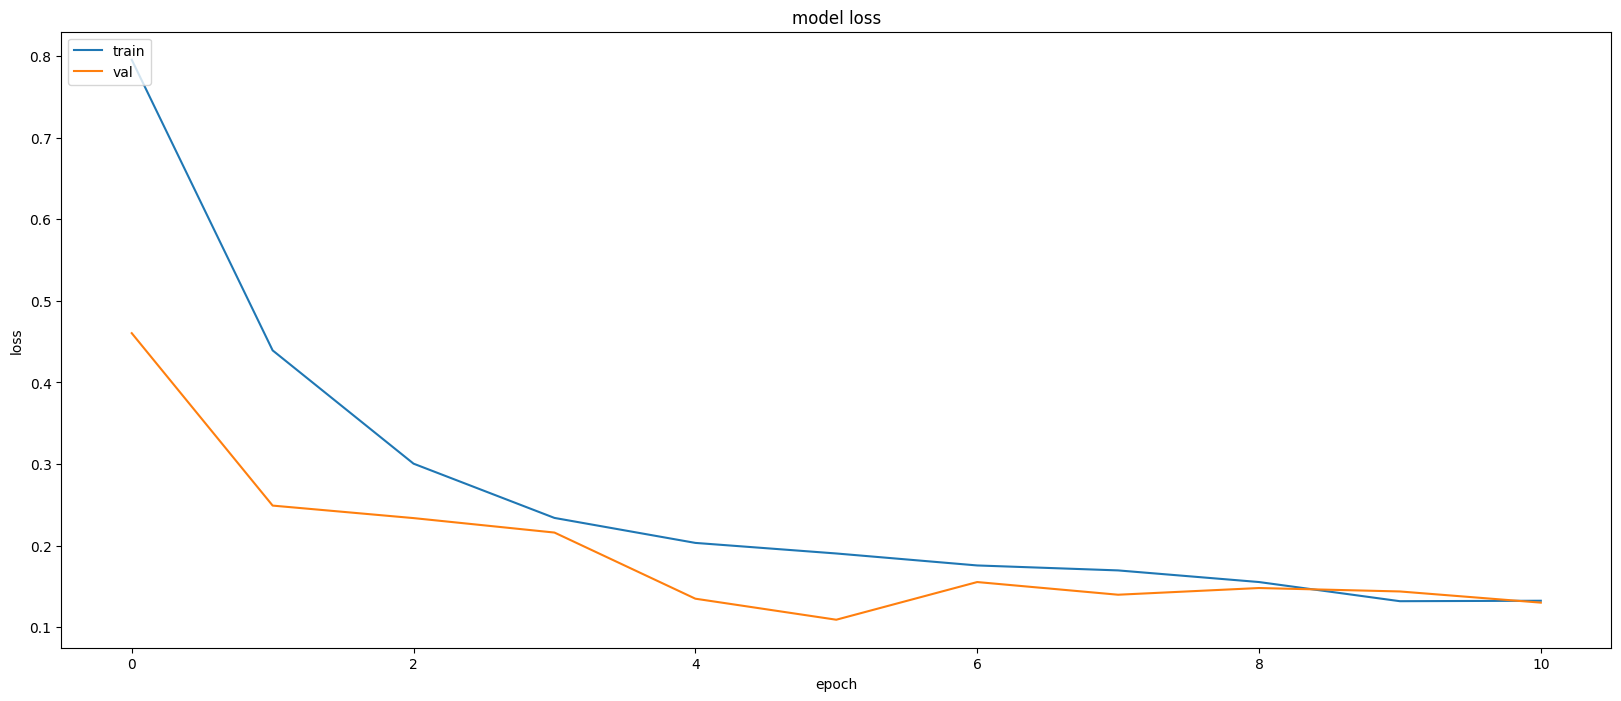

In [165]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

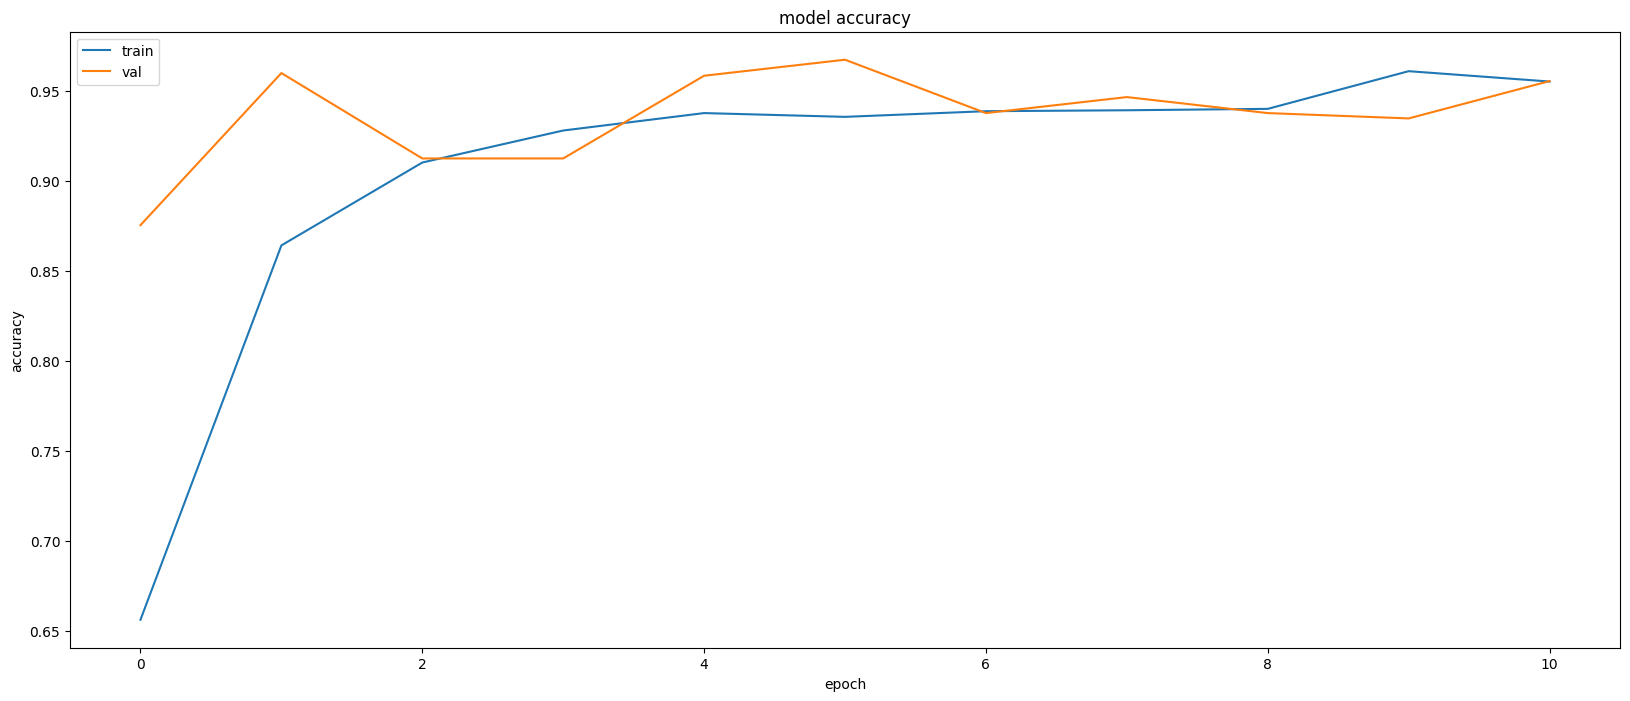

In [166]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [167]:
from sklearn.metrics import classification_report

In [174]:
y_val = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred,axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 425ms/step


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       225
           1       0.95      0.96      0.95       225
           2       0.99      1.00      0.99       225

    accuracy                           0.97       675
   macro avg       0.97      0.97      0.97       675
weighted avg       0.97      0.97      0.97       675



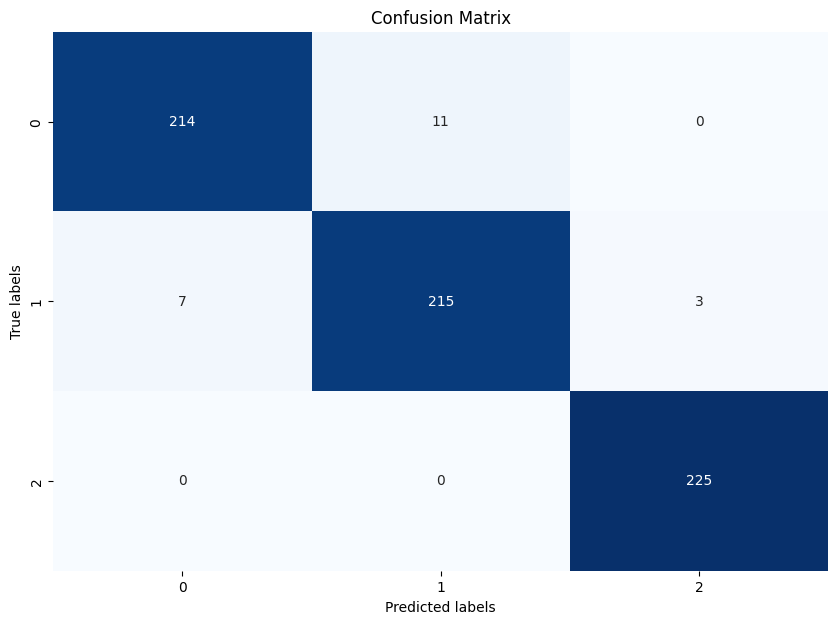

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_val are the true labels and y_pred are the predictions from your model
print(classification_report(y_val, y_pred))

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [176]:
class_indices = validation_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [177]:
filenames = validation_generator.filenames

In [178]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename    actual predicted  Same
0     overripe/OR(1).jpg  overripe  overripe  True
1    overripe/OR(10).jpg  overripe  overripe  True
2   overripe/OR(100).jpg  overripe  overripe  True
3  overripe/OR(1000).jpg  overripe  overripe  True
4  overripe/OR(1001).jpg  overripe  overripe  True
5  overripe/OR(1002).jpg  overripe  overripe  True
6  overripe/OR(1003).jpg  overripe  overripe  True
7  overripe/OR(1004).jpg  overripe  overripe  True
8  overripe/OR(1005).jpg  overripe  overripe  True
9  overripe/OR(1006).jpg  overripe  overripe  True

In [179]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [181]:
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df, title="Images", max_images=25):
    # Reset the index of the DataFrame to ensure continuity
    temp_df = temp_df.reset_index(drop=True)
    
    # Determine the number of images to display (limited by max_images)
    num_images = min(len(temp_df), max_images)
    
    # Calculate the number of rows needed for the subplots, assuming 5 columns
    num_rows = (num_images + 4) // 5  # Add 4 for rounding up
    
    plt.figure(figsize=(15, 3 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 5, i + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        
        # Assume `readImage` is a function you've defined elsewhere to load an image by filename
        # And assuming `filename`, `actual`, `predicted` are column names in your DataFrame
        image = readImage(f"/kaggle/input/new-banana/dataset/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]}\nP: {temp_df.predicted[i]}')
        plt.axis('off')  # Hide the axis
        
    plt.suptitle(title)
    plt.show()


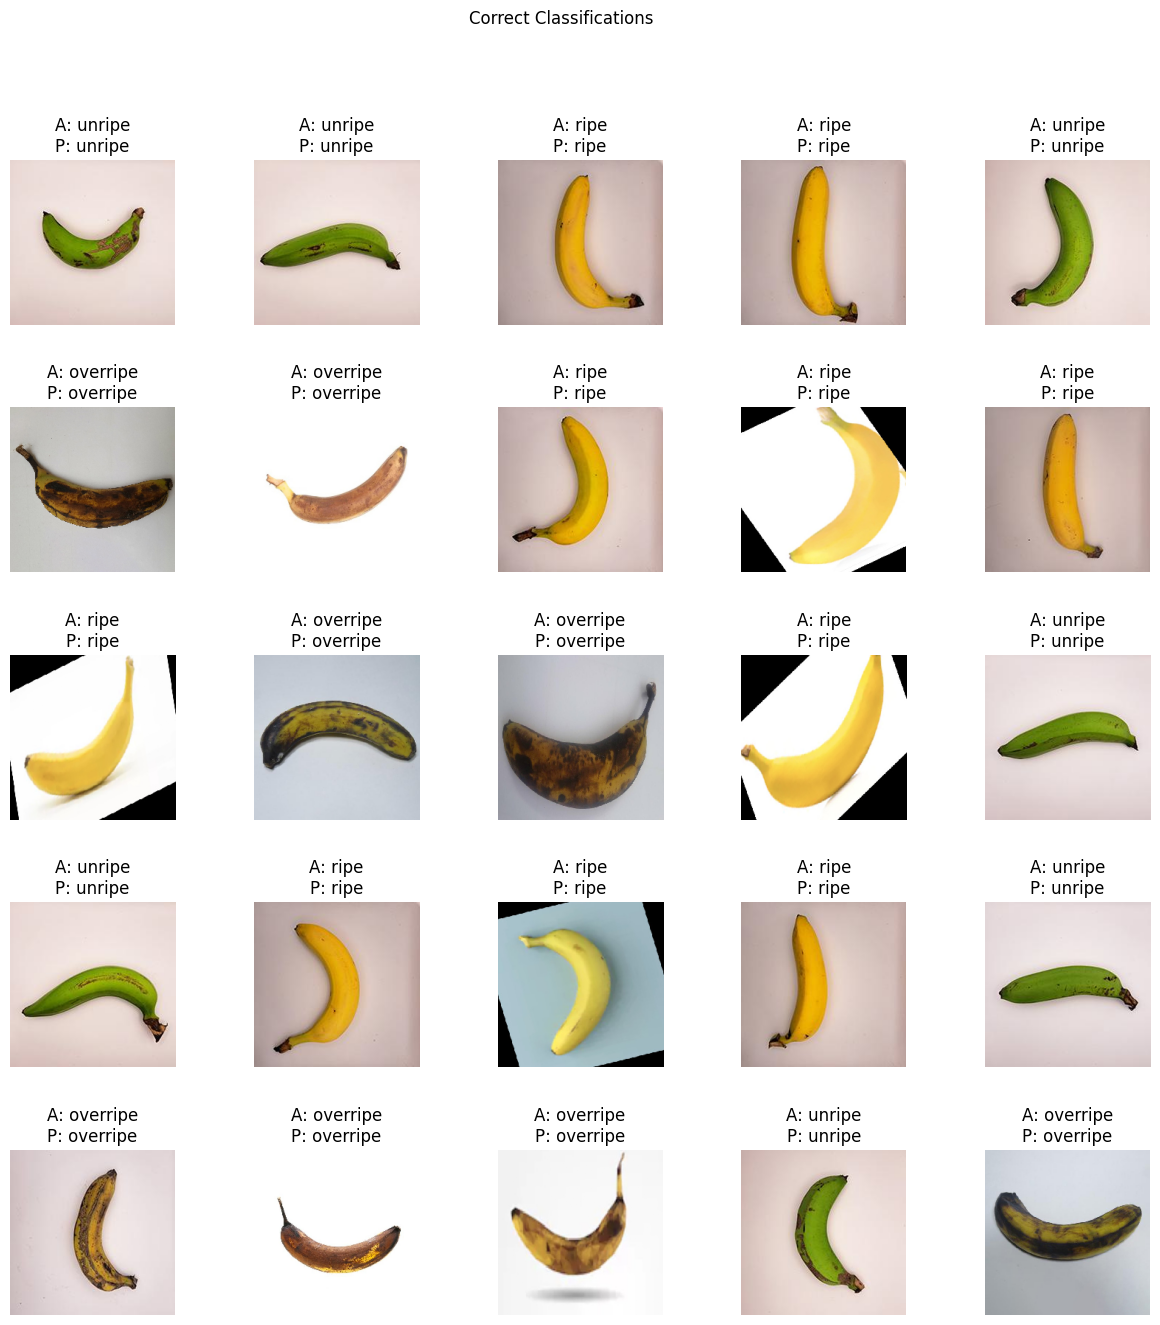

In [182]:
display_images(val_df[val_df['Same'] == True], title="Correct Classifications", max_images=25)

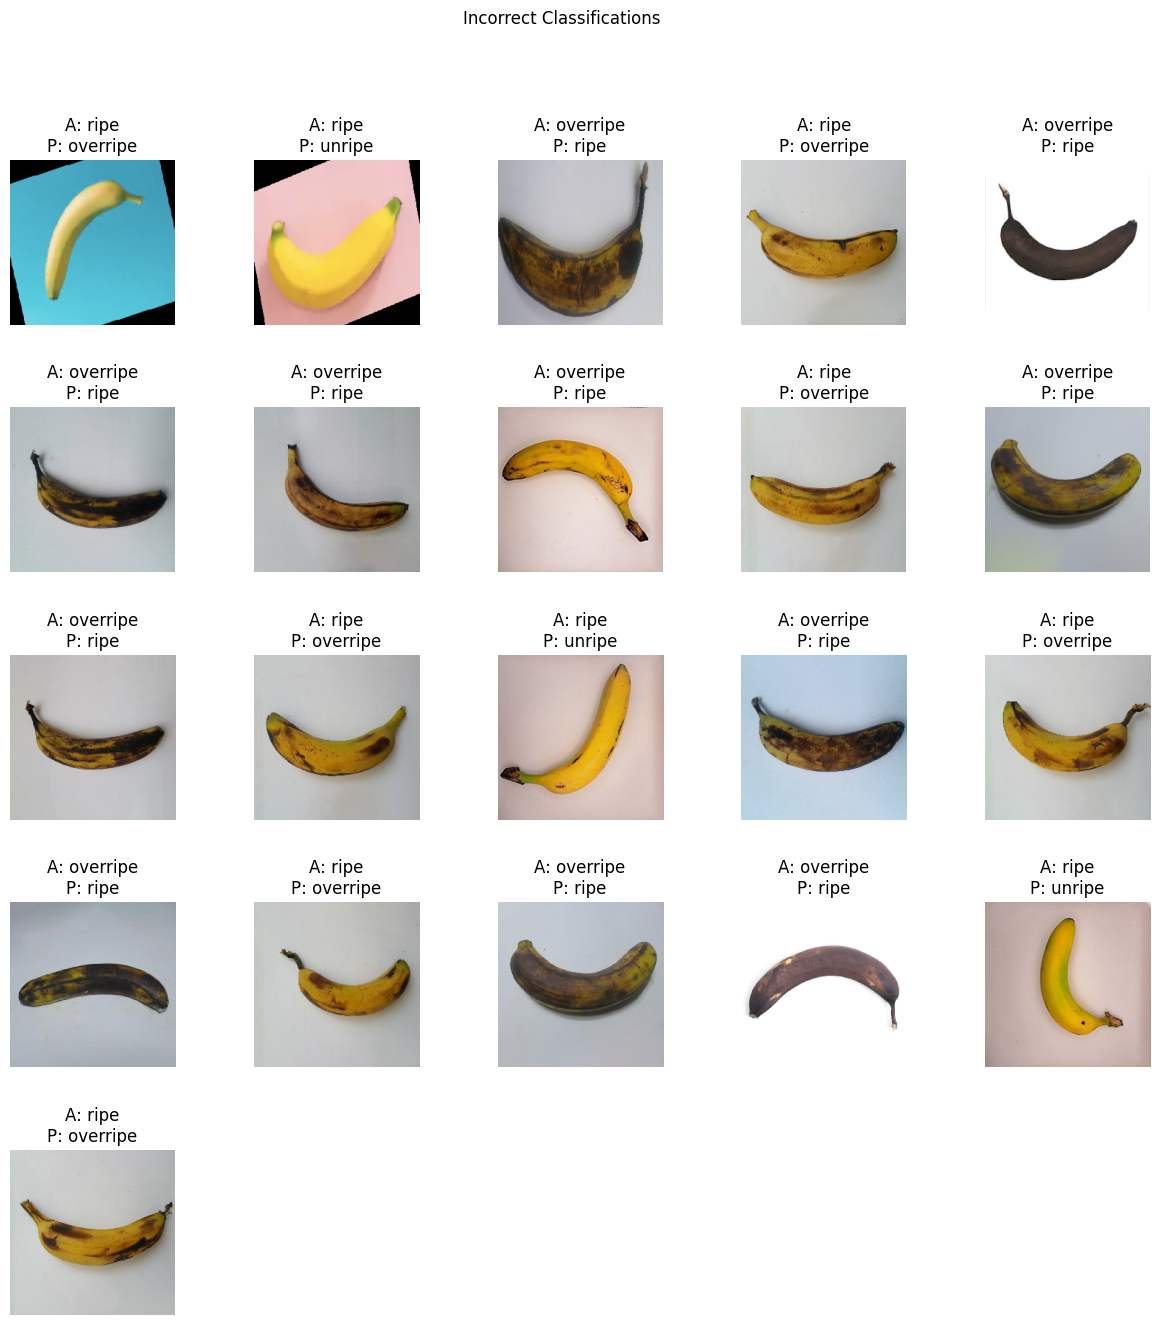

In [183]:
# For incorrect classifications:
display_images(val_df[val_df['Same'] != True], title="Incorrect Classifications", max_images=25)


In [185]:
def make_gradcam_heatmap(img_array, model, pred_index=None):
    # Adjust to create a model that outputs the desired convolutional layer's output
    grad_model = Model(inputs=model.inputs, 
                       outputs=[model.get_layer('block5_conv4').output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.matmul(conv_outputs, pooled_grads[..., tf.newaxis])
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(), preds


In [186]:
import matplotlib.cm as cm

In [187]:
val_df

filename    actual predicted  Same
0      unripe/ur(1074).jpg    unripe    unripe  True
1      unripe/ur(1139).jpg    unripe    unripe  True
2         ripe/r(1008).jpg      ripe      ripe  True
3         ripe/r(1054).jpg      ripe      ripe  True
4      unripe/ur(1148).jpg    unripe    unripe  True
..                     ...       ...       ...   ...
670    unripe/ur(1021).jpg    unripe    unripe  True
671       ripe/r(1173).jpg      ripe      ripe  True
672  overripe/OR(1176).jpg  overripe  overripe  True
673  overripe/OR(1136).jpg  overripe  overripe  True
674  overripe/OR(1111).jpg  overripe  overripe  True

[675 rows x 4 columns]

In [188]:
def gradCAMImage(image):
    path = f"/kaggle/input/new-banana/dataset/{image}"
    img = readImage(path)
    img = np.expand_dims(img,axis=0)
    heatmap,preds = make_gradcam_heatmap(img,model)

    img = load_img(path)
    img = img_to_array(img)
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.8 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    
    return superimposed_img

In [190]:
def gradcam_of_images(correct_class):
    grad_images = []
    titles = []
    # Assuming val_df is defined in your global scope and has 'Same', 'filename', 'actual', and 'predicted' columns
    temp_df = val_df[val_df['Same'] == correct_class]
    temp_df = temp_df.reset_index(drop=True)
    
    # Ensure you do not exceed the DataFrame's length
    num_images = min(len(temp_df), 15)
    for i in range(num_images):
        image_path = temp_df.iloc[i]['filename']  # Assuming 'filename' column has the path or identifier for the images
        grad_image = gradCAMImage(image_path)  # You might need to pass additional arguments like model, etc.
        grad_images.append(grad_image)
        titles.append(f"A: {temp_df.iloc[i]['actual']} P: {temp_df.iloc[i]['predicted']}")  # Adjust if these columns are named differently

    return grad_images, titles

In [191]:
# Example usage
correctly_classified, c_titles = gradcam_of_images(correct_class=True)
misclassified, m_titles = gradcam_of_images(correct_class=False)

/tmp/ipykernel_34/2124463872.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


In [192]:
import matplotlib.pyplot as plt

def display_heatmaps(classified_images, titles):
    num_images = len(classified_images)  # Determine the number of images to display
    rows = (num_images + 4) // 5  # Calculate rows needed for displaying images, assuming 5 columns

    plt.figure(figsize=(20, 4 * rows))  # Adjust figure size based on number of rows
    for i in range(num_images):  # Iterate through the number of available images
        plt.subplot(rows, 5, i + 1)  # Adjust subplot to accommodate the current image
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        plt.imshow(classified_images[i])  # Display each image
        plt.title(titles[i])  # Set title for each subplot
        plt.axis('off')  # Hide axis to focus on images
    plt.show()


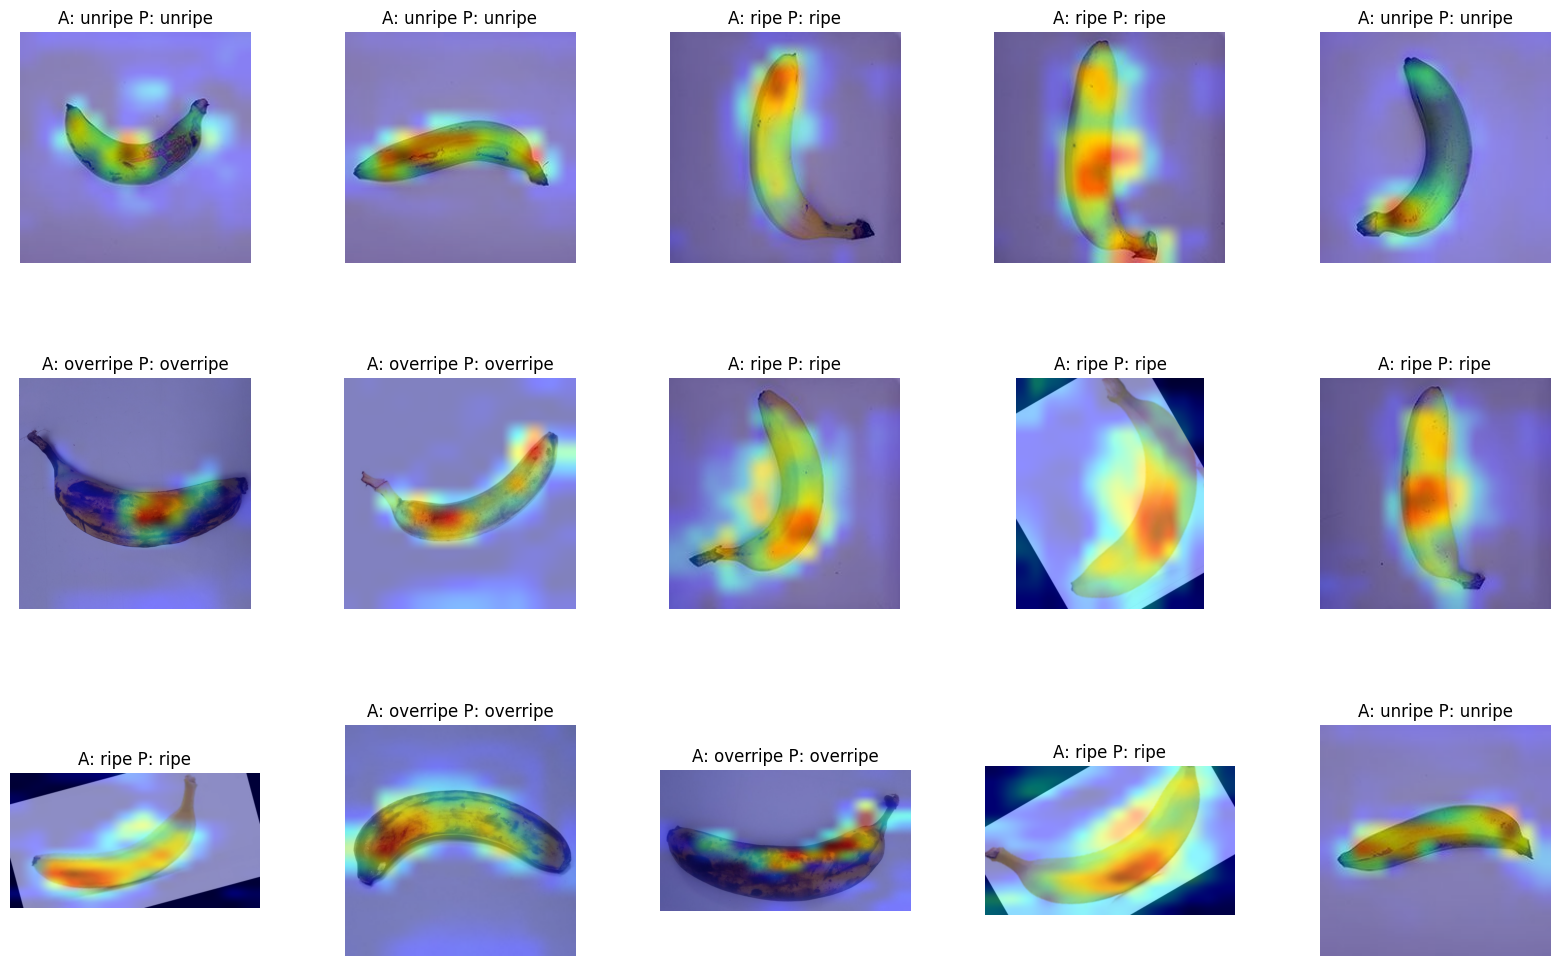

In [193]:
display_heatmaps(correctly_classified,c_titles)

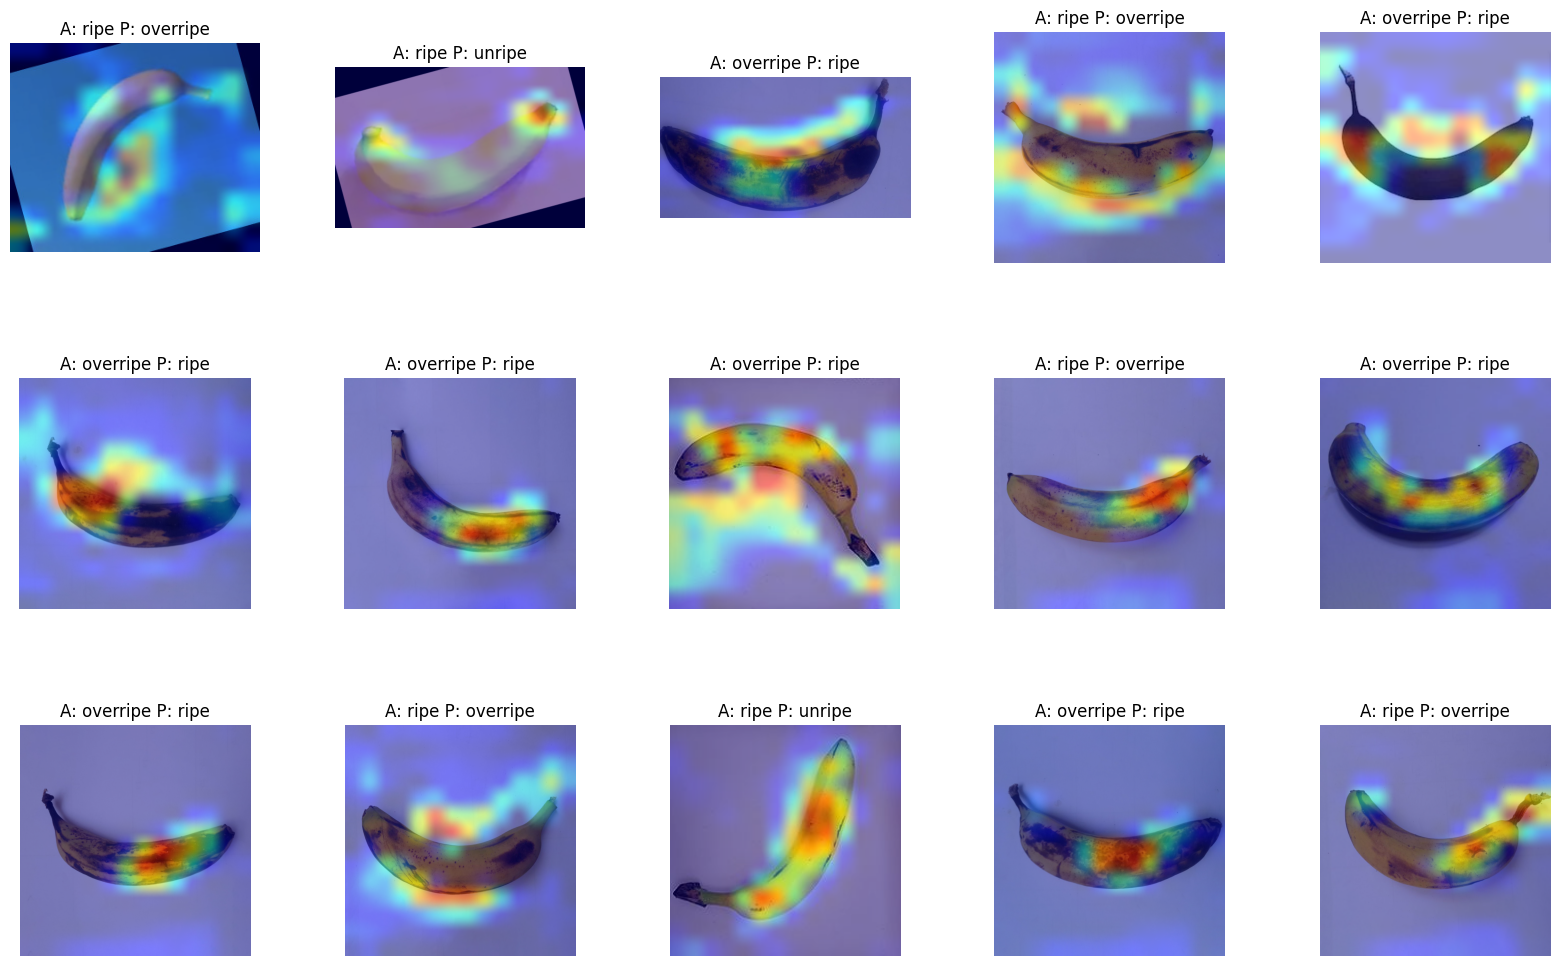

In [194]:
display_heatmaps(misclassified,m_titles)